# Body Position Predict

키, 눈 높이, 성별은 입력되는 데이터 -> Data를 의미하게 됨
나머지는 예측해야하는 것 -> Label을 의미하게 됨

도출된 결과값을 Pixel에 맞게 변환하여 사용해야 함!

In [1]:
# load dataset
import pandas as pd

body_dataset = pd.read_csv("body_value.csv")

In [2]:
# data size
body_dataset.shape

(6417, 11)

In [3]:
# value list
body_dataset.columns

Index(['Gender', 'Height', 'Eyes_height', 'Shoulder', 'Shoulder_Side', 'Chest',
       'Waist_Base', 'Hip', 'Waist', 'Knee', 'Groin'],
      dtype='object')

In [4]:
body_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417 entries, 0 to 6416
Data columns (total 11 columns):
Gender           6417 non-null int64
Height           6417 non-null int64
Eyes_height      6417 non-null int64
Shoulder         6417 non-null int64
Shoulder_Side    6417 non-null int64
Chest            6417 non-null int64
Waist_Base       6417 non-null int64
Hip              6417 non-null int64
Waist            6417 non-null int64
Knee             6417 non-null int64
Groin            6417 non-null int64
dtypes: int64(11)
memory usage: 551.5 KB


# SVM

In [2]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np

# data type change
body_dataset = body_dataset.astype(np.float32)

# create model
svm_model = svm.SVC(kernel= 'sigmoid') 

csv_data = body_dataset.drop(['Shoulder','Shoulder_Side', 'Chest', 'Waist_Base', 'Hip', 'Waist', 'Knee', 'Groin'], axis=1)
csv_label = body_dataset['Shoulder']

# separate dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(csv_data, csv_label, test_size=0.3, random_state=0)

# train
svm_model.fit(X_train, y_train)

# predict
predict = svm_model.predict(X_test)

# score
accuracy_score = metrics.accuracy_score(y_test, predict)
print(accuracy_score)

0.00986500519211


In [51]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np

# data type change
body_dataset = body_dataset.astype(np.float32)
pd.get_dummies(body_dataset['Gender'])

# create model
svm_model = svm.SVC(kernel= 'linear') 

csv_data = body_dataset.drop('Shoulder', axis=1)
csv_data = body_dataset.drop('Shoulder_Side', axis=1)
csv_data = body_dataset.drop('Chest', axis=1)
csv_data = body_dataset.drop('Waist_Base', axis=1)
csv_data = body_dataset.drop('Hip', axis=1)
csv_data = body_dataset.drop('Waist', axis=1)
csv_data = body_dataset.drop('Knee', axis=1)
csv_data = body_dataset.drop('Groin', axis=1)
csv_label = body_dataset['Chest']

# separate dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(csv_data, csv_label, test_size=0.3, random_state=0)

# train
svm_model.fit(X_train, y_train)

# predict
predict = svm_model.predict(X_test)

# score
accuracy_score = metrics.accuracy_score(y_test, predict)
print(accuracy_score)

0.8125649013499481


=> ** 위와 같이 .drop을 여러번 반복 사용할 경우 최종 코드, 즉 csv_data = body_dataset.drop('Groin', axis=1)만 적용됨 **

# Graph

Text(0,0.5,'Eye_Height')

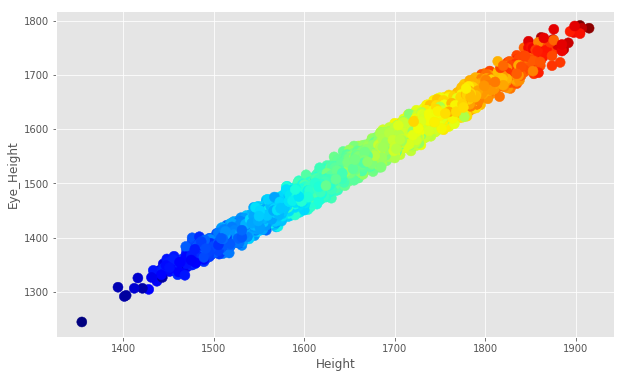

In [18]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.set_cmap('jet')
%matplotlib inline

plt.figure(figsize=(10,6))
plt.scatter(body_dataset['Height'], body_dataset['Eyes_height'], c=y,s=100)
plt.xlabel('Height')
plt.ylabel('Eye_Height')

Text(0,0.5,'Eye_Height')

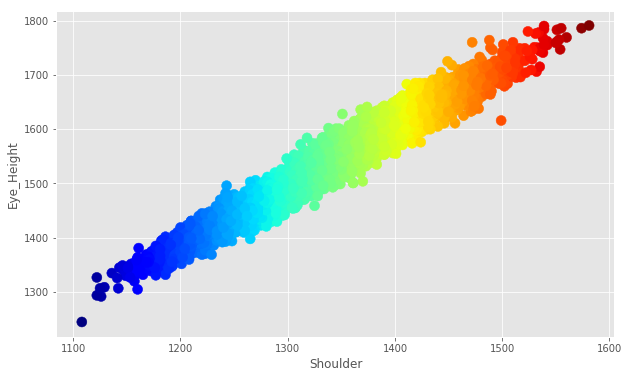

In [19]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.set_cmap('jet')
%matplotlib inline

plt.figure(figsize=(10,6))
plt.scatter(body_dataset['Shoulder'], body_dataset['Eyes_height'], c=y,s=100)
plt.xlabel('Shoulder')
plt.ylabel('Eye_Height')

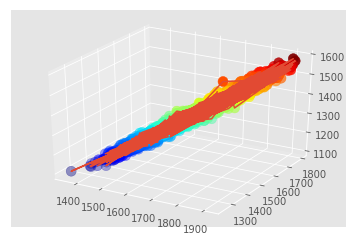

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.plot(body_dataset['Height'],body_dataset['Eyes_height'],body_dataset['Shoulder'])  
ax.scatter(body_dataset['Height'],body_dataset['Eyes_height'],body_dataset['Shoulder'], c=y,s=100)


#body_dataset['Height'],body_dataset['Eyes_height'],body_dataset['Shoulder']

=> 선형의 데이터 분포를 보임

In [37]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np

# data type change
body_dataset = body_dataset.astype(np.float32)

# create model
svm_model = svm.SVC(kernel= 'linear') 

# calculate Ratio
result_list1 = []
result_list2 = []
for i in range(len(body_dataset)):
    Ratio = body_dataset['Height'][i] - body_dataset['Eyes_height'][i]
    G = body_dataset['Gender'][i]
    result_list1.append(Ratio)
    result_list2.append(G)
        
submission = pd.DataFrame({'Rate':result_list1, 'Gender':result_list2})
submission = submission[['Rate', 'Gender']]
submission.to_csv('ratio_result.csv',index=False)

rate_data = pd.read_csv("./ratio_result.csv")
csv_label = body_dataset['Shoulder_Side']

# separate dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(csv_data, csv_label, test_size=0.3, random_state=0)

# train
svm_model.fit(X_train, y_train)

# predict
predict = svm_model.predict(X_test)

# score
accuracy_score = metrics.accuracy_score(y_test, predict)
print(accuracy_score)

0.811007268951


=> train을 시키는 데이터가 잘못되어서 이러한 값이 나온 것일 것!

# 눈 부터 머리까지의 비율로 학습

In [64]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np

# data type change
body_dataset = body_dataset.astype(np.float32)

# create model
svm_model = svm.SVC(kernel= 'linear') 

# calculate Ratio
result_list1 = []
result_list2 = []
result_list3 = []
for i in range(len(body_dataset)):
    Ratio = body_dataset['Height'][i] - body_dataset['Eyes_height'][i]
    result_Ratio = body_dataset['Height'][i] / Ratio * 1000
    
    Ratio2 = body_dataset['Height'][i] - body_dataset['Shoulder'][i]
    result_Ratio2 = Ratio2 / body_dataset['Height'][i] * 1000
    
    G = body_dataset['Gender'][i]
    result_list1.append(result_Ratio)
    result_list2.append(G)
    result_list3.append(result_Ratio2)
        
submission = pd.DataFrame({'Rate':result_list1, 'Gender':result_list2, 'BodyR':result_list3})
submission = submission[['Rate', 'Gender', 'BodyR']]
submission.to_csv('eye_and_height_ratio.csv',index=False)

Text(0,0.5,'Shoulder')

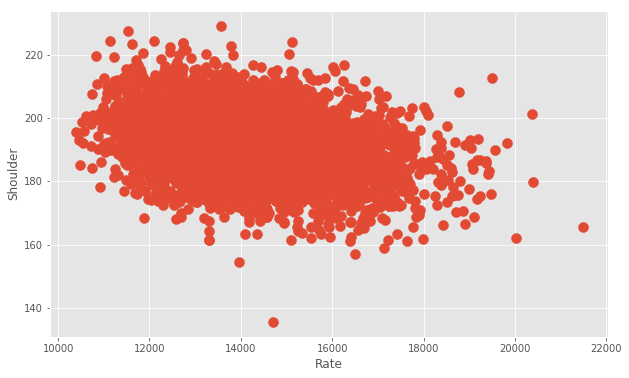

In [65]:
import matplotlib.pyplot as plt

rate_data = pd.read_csv("eye_and_height_ratio.csv")

plt.style.use('ggplot')
plt.set_cmap('jet')
%matplotlib inline

plt.figure(figsize=(10,6))
plt.scatter(rate_data['Rate'], rate_data['BodyR'],s=100)
plt.xlabel('Rate')
plt.ylabel('Shoulder')

<p>=> 같은 비율이라도 범위가 60정도, 실제로는 0.06정도가 차이나게 되는데, 이는 실제 이미지에 적용시 27cm 정도 차이남을 의미 </p>
<p>=> 따라서 회귀이론을 이용해 적용시키는데는 무리가 있음 </p>

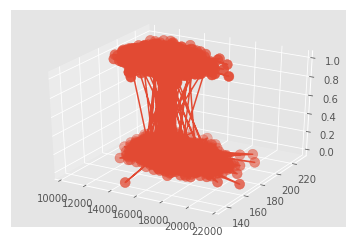

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.plot(rate_data['Rate'], rate_data['BodyR'], rate_data['Gender'])  
ax.scatter(rate_data['Rate'], rate_data['BodyR'], rate_data['Gender'], s=100)

In [16]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np

rate_data = pd.read_csv("eye_and_height_ratio.csv")
pd.get_dummies(rate_data['Gender'])
rate_data = rate_data.astype(np.int32)

csv_data = rate_data.drop('BodyR', axis=1)
csv_label = rate_data['BodyR']

# create model
svm_model = svm.SVC(kernel= 'rbf') 

# separate dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(csv_data, csv_label, test_size=0.3, random_state=0)

In [17]:
# train
svm_model.fit(X_train, y_train)

# predict
predict = svm_model.predict(X_test)

# score
accuracy_score = metrics.accuracy_score(y_test, predict)
print(accuracy_score)

0.035306334371754934


In [20]:
# woman predict

predict = svm_model.predict([[11278, 1]])
predict

array([198])

=> SVMkernel = (precomputed), sigmoid, rbf, poly, linear

# Deep Learning

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

X = pd.read_csv("./ratio_result.csv")
y = body_dataset['Shoulder_Side']

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
             precision    recall  f1-score   support

       1140       0.00      0.00      0.00         1
       1145       0.00      0.00      0.00         1
       1157       0.00      0.00      0.00         1
       1165       0.00      0.00      0.00         1
       1169       0.00      0.00      0.00         1
       1176       0.00      0.00      0.00         1
       1177       0.00      0.00      0.00         2
       1179       0.00      0.00      0.00         1
       1184       0.00      0.00      0.00         0
       1185       0.00      0.00      0.00         1
       1186       0.00      0.00      0.00         3
       1188       0.00      0.00      0.00         1
       1189       0.00      0.00      0.00         2
       1190       0.00      0.00      0.00         2
       1191       0.00      0.00      0.00         2
       1192       0.00 

C:\Anaconda3\envs\Python3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\Python3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# KNN

In [4]:
import numpy as np
import cv2
import pandas as pd
from sklearn import metrics
from sklearn import model_selection as modsel
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

body_dataset = pd.read_csv("body_value.csv")

# data type change
body_dataset = body_dataset.astype(np.float32)

# create KNN
knn = KNeighborsClassifier(n_neighbors=100, weights='uniform', algorithm='auto')

csv_data = body_dataset.drop(['Shoulder','Shoulder_Side', 'Chest', 'Waist_Base', 'Hip', 'Waist', 'Knee', 'Groin'], axis=1)
csv_label = body_dataset['Shoulder']

# separate dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(csv_data, csv_label, test_size=0.3, random_state=0)

# laerning knn
knn.fit(X_train, y_train)

# predict
predict = knn.predict(X_test)

# score
submission = pd.DataFrame({'data1':predict, 'data2':y_test})
submission = submission[['data1', 'data2']]
submission.to_csv('sub.csv',index=False)

data = pd.read_csv("./sub.csv")
t=0
s=0
for i in range(len(data)):
    t=t+1
    if(data['data2'][i] == data['data1'][i]):
        s=s+1
print(s/t * 100, "%")

3.322949117341641 %


# Image에 적용

In [39]:
import cv2
import numpy as np
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

face_cascade = cv2.CascadeClassifier ( 'haarcascade_frontalface_default.xml' )
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

img = cv2.imread('A.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

eye_height = 0
ey=0
ew=0

eyes = eye_cascade.detectMultiScale(gray, 1.3, 15)
for (ex,ey,ew,eh) in eyes:
    eye_height = int((ey+eh+ey)/2)
    cv2.line(img,(0, eye_height),(2988, eye_height),(0,255,0),2)
cv2.imwrite('img.jpg',img)

pixel_num = 0
Y_pixel = 0
for i in range(len(gray)):
    for j in range(len(gray[i])):
        Y_pixel = Y_pixel + 1
    pixel_num = pixel_num + 1
    
User_Height = [int(1500)]
one_pixel = User_Height[0] / pixel_num
pixel_eye_height = pixel_num - eye_height
real_eye_height = [int(pixel_eye_height *  one_pixel)]
Ratio = User_Height[0] - real_eye_height[0]
gender = [int(1)] # female

# store user data
submission = pd.DataFrame({'Gender':gender, 'Height':User_Height, 'Eyes_height':real_eye_height, 'Ratio':Ratio})
submission = submission[['Gender','Height','Eyes_height', 'Ratio']]
submission.to_csv('./user_body_value.csv',index=False)

test_dataset = pd.read_csv("user_body_value.csv")

# data type change
body_dataset = body_dataset.astype(np.float32)

# create model
svm_model = svm.SVC(kernel= 'linear') 

rate_data = pd.read_csv("./ratio_result.csv")
csv_label = body_dataset['Shoulder_Side']
test_dataset = test_dataset.drop(['Height', 'Eyes_height'], axis=1)

# train
svm_model.fit(rate_data, csv_label)

# predict - shoulder
predict = svm_model.predict(test_dataset)

shoulder_pixel = predict*pixel_num/User_Height[0]
cv2.line(img,(0, pixel_num-shoulder_pixel),(2988, pixel_num-shoulder_pixel),(255,255,0),2)
cv2.imwrite('img.jpg',img)

True

In [26]:
import cv2
import numpy as np
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

img = cv2.imread('A.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

pixel_num = 0
Y_pixel = 0
for i in range(len(gray)):
    for j in range(len(gray[i])):
        Y_pixel = Y_pixel + 1
    pixel_num = pixel_num + 1
    
User_Height = [int(1500)]
one_pixel = User_Height[0] / pixel_num

shoulder_pixel = int(0.198*pixel_num)
cv2.line(img,(0, shoulder_pixel),(2988, shoulder_pixel),(255,255,0),2)
cv2.imwrite('img.jpg',img)

True

# Tensorflow

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def shuffle_data(x_train, y_train):
    temp_index = np.arange(len(x_train))
    np.random.shuffle(temp_index)
    x_temp = np.zeros(x_train.shape)
    y_temp = np.zeros(y_train.shape)
    x_temp = x_train[temp_index]
    y_temp = y_train[temp_index]
    return x_temp, y_temp

def minmax_normalize(x):
    xmax, xmin = x.max(), x.min()
    return (x-xmin)/(xmax-xmin)

def minmax_get_norm(realx, arrx):
    xmax, xmin = arrx.max(), arrx.min()
    normx = (realx-xmin)/(xmax-xmin)
    return normx

def minmax_get_denorm(normx, arrx):
    xmax, xmin = arrx.max(), arrx.min()
    realx = normx * (xmax-xmin) + xmin
    return realx


# 6418개의 data
traincsvdata = np.loadtxt('train_data.csv', unpack=True, delimiter=",", skiprows=1)

x0_data = traincsvdata[0]  # gender
x1_data = traincsvdata[1]  # height
x2_data = traincsvdata[2]  # eyes

y1_data = traincsvdata[3]  # shoulder
y2_data = traincsvdata[4]  # shoulder side
y3_data = traincsvdata[5]  # chest
y4_data = traincsvdata[6]  # waist_base
y5_data = traincsvdata[7]  # hip
y6_data = traincsvdata[8]  # waist
y7_data = traincsvdata[9]  # knee
y8_data = traincsvdata[10]  # groin

# normalization
x1_data = minmax_normalize(x1_data)
x2_data = minmax_normalize(x2_data)
x0_data = minmax_normalize(x0_data)

x_data = [[item for item in x0_data], [item for item in x1_data], [item for item in x2_data]]
x_data = np.reshape(x_data, (len(y1_data)*3), order="F")
x_data = np.reshape(x_data, (-1,3))

y1_data = np.reshape(y1_data, [len(y1_data), 1])


BATCH_SIZE = 100
BATCH_NUM = int(len(x1_data)/BATCH_SIZE)

input_data = tf.placeholder(tf.float32, shape=[None, 3])
output_data = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_uniform([3, 5], 0.0, 1.0))
W2 = tf.Variable(tf.random_uniform([5, 10], 0.0, 1.0))
W3 = tf.Variable(tf.random_uniform([10, 15], 0.0, 1.0))
W4 = tf.Variable(tf.random_uniform([15, 20], 0.0, 1.0))
W5 = tf.Variable(tf.random_uniform([20, 20], 0.0, 1.0))
W6 = tf.Variable(tf.random_uniform([20, 18], 0.0, 1.0))
W7 = tf.Variable(tf.random_uniform([18, 15], 0.0, 1.0))
W8 = tf.Variable(tf.random_uniform([15, 10], 0.0, 1.0))
W9 = tf.Variable(tf.random_uniform([10, 3], 0.0, 1.0))
W_out = tf.Variable(tf.random_uniform([3, 1], 0.0, 1.0))

hidden1 = tf.nn.relu(tf.matmul(input_data, W1))
hidden2 = tf.nn.relu(tf.matmul(hidden1, W2))
hidden3 = tf.nn.relu(tf.matmul(hidden2, W3))
hidden4 = tf.nn.relu(tf.matmul(hidden3, W4))
hidden5 = tf.nn.relu(tf.matmul(hidden4, W5))
hidden6 = tf.nn.relu(tf.matmul(hidden5, W6))
hidden7 = tf.nn.relu(tf.matmul(hidden6, W7))
hidden8 = tf.nn.relu(tf.matmul(hidden7, W8))
hidden9 = tf.nn.relu(tf.matmul(hidden8, W9))
output = tf.matmul(hidden9, W_out)

loss = tf.reduce_mean(tf.square(output-output_data))
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

# train
sess = tf.Session()
sess.run(init)

for step in range(1000):
    index = 0
    x_data, y1_data = shuffle_data(x_data, y1_data)
    
    for batch_iter in range(BATCH_NUM-1):
        feed_dic_R = {input_data:x_data[index:index+BATCH_SIZE], output_data:y1_data[index:index+BATCH_SIZE]}
        sess.run(train, feed_dict = feed_dic_R)
        index += BATCH_SIZE

# predict하고자한는 sample data
arr_ask_x = [[1.0, 1500.0, 1367.0]]

# Predict
for i in range(len(arr_ask_x)):
    ask_x = [arr_ask_x[i]]
    ask_norm_x = [[minmax_get_norm(ask_x[0][0], traincsvdata[0]), minmax_get_norm(ask_x[0][1], traincsvdata[1]), minmax_get_norm(ask_x[0][2], traincsvdata[2])]]
    answer_norm_y = sess.run(output, feed_dict={input_data:ask_norm_x})
    answer_y = minmax_get_denorm(answer_norm_y, traincsvdata[3])
    
    print("Gender : ", ask_x[0][0], "   Height : ", ask_x[0][1], "    Eyes : ", ask_x[0][2], "    Shoulder : ", answer_y[0][0])


Gender :  1.0    Height :  1500.0     Eyes :  1367.0     Shoulder :  nan


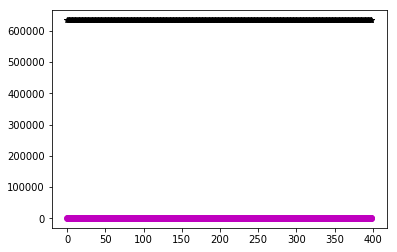

In [15]:
# test
test_csv_x_data = np.loadtxt('test_data.csv', unpack=True, delimiter=',', skiprows=1)

test_x0_data = test_csv_x_data[0]
test_x1_data = test_csv_x_data[1]
test_x2_data = test_csv_x_data[2]

test_y1_data = test_csv_x_data[3]

test_x0_data = minmax_normalize(test_x0_data)
test_x1_data = minmax_normalize(test_x1_data)
test_x2_data = minmax_normalize(test_x2_data)
test_y1_data = minmax_normalize(test_y1_data)

test_x_data = [[item for item in test_x0_data], [item for item in test_x1_data], [item for item in test_x2_data]]
test_x_data = np.reshape(test_x_data, (len(test_y1_data)*3), order="F")
test_x_data = np.reshape(test_x_data, (-1,3))

plt.plot(list(range(len(test_csv_x_data[3]))), test_csv_x_data[3], 'mo')

feed_dict = {input_data: test_x_data}
test_pred_y_data = minmax_get_denorm(sess.run(output, feed_dict=feed_dict), traincsvdata[3])

plt.plot(list(range(len(test_csv_x_data[3]))), test_pred_y_data, 'k*')

plt.show()

=> 학습이 제대로 되지 않음을 의미

# 의사결정 Tree

In [24]:
import pandas as pd
import numpy as np
from IPython.display import display

train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

train = train.astype(np.float32)
test = test.astype(np.float32)

In [25]:
display(train.info)

<bound method DataFrame.info of       Gender  Height  Eyes_height  Shoulder  Shoulder_Side   Chest  \
0        1.0  1505.0       1405.0    1215.0         1237.0  1112.0   
1        1.0  1640.0       1525.0    1328.0         1345.0  1211.0   
2        1.0  1594.0       1483.0    1294.0         1304.0  1174.0   
3        1.0  1495.0       1383.0    1217.0         1227.0  1093.0   
4        1.0  1630.0       1514.0    1343.0         1347.0  1215.0   
5        1.0  1522.0       1417.0    1222.0         1236.0  1104.0   
6        1.0  1523.0       1406.0    1214.0         1226.0  1112.0   
7        1.0  1542.0       1418.0    1250.0         1264.0  1140.0   
8        1.0  1708.0       1604.0    1402.0         1416.0  1270.0   
9        1.0  1481.0       1369.0    1188.0         1203.0  1090.0   
10       1.0  1510.0       1398.0    1226.0         1240.0  1112.0   
11       1.0  1590.0       1472.0    1316.0         1325.0  1195.0   
12       1.0  1490.0       1383.0    1207.0         1220.0

In [26]:
train.shape

(6018, 11)

In [27]:
test.shape

(399, 11)

In [28]:
train.columns

Index(['Gender', 'Height', 'Eyes_height', 'Shoulder', 'Shoulder_Side', 'Chest',
       'Waist_Base', 'Hip', 'Waist', 'Knee', 'Groin'],
      dtype='object')

In [29]:
# predict data list
feature1 = train.drop(['Shoulder','Shoulder_Side', 'Chest', 'Waist_Base', 'Hip', 'Waist', 'Knee', 'Groin'], axis=1).columns
feature2 = test.drop(['Shoulder','Shoulder_Side', 'Chest', 'Waist_Base', 'Hip', 'Waist', 'Knee', 'Groin'], axis=1).columns

In [30]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(train[feature1], train["Shoulder"])
predictions = dtc.predict(test[feature2])
dtc.score(test[feature2], test["Shoulder"])

0.015037593984962405

In [46]:
# Ratio로 학습

import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split

data_set = pd.read_csv("ratio_result.csv")
data_set = data_set.astype(np.float32)

csv_data = data_set.drop(['Shoulder'], axis=1)
csv_label = data_set['Shoulder']
X_train, X_test, y_train, y_test = train_test_split(csv_data, csv_label, test_size=0.3, random_state=0)

from sklearn import tree

dtc = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
dtc.score(X_test, predictions)

1.0

In [43]:
predictions

array([1314., 1379., 1277., ..., 1249., 1292., 1203.], dtype=float32)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

     1126.0       0.00      0.00      0.00         1
     1129.0       0.00      0.00      0.00         0
     1141.0       0.00      0.00      0.00         0
     1143.0       0.00      0.00      0.00         1
     1151.0       0.00      0.00      0.00         1
     1154.0       0.00      0.00      0.00         0
     1157.0       0.00      0.00      0.00         2
     1159.0       0.00      0.00      0.00         1
     1160.0       0.00      0.00      0.00         2
     1161.0       0.00      0.00      0.00         1
     1165.0       0.00      0.00      0.00         2
     1168.0       0.00      0.00      0.00         1
     1170.0       0.00      0.00      0.00         2
     1171.0       0.00      0.00      0.00         2
     1173.0       0.00      0.00      0.00         0
     1175.0       0.00      0.00      0.00         2
     1176.0       0.00      0.00      0.00         2
     1177.0       0.00      0.00      0.00   

C:\Anaconda3\envs\Python3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\Python3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [47]:
print(confusion_matrix(y_test, predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
#  k-fold validation

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

data_set = pd.read_csv("ratio_result.csv")
data_set = data_set.astype(np.float32)

cv = KFold(n_splits=10)
dtc = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
scores = []

train_features = data_set.drop(['Shoulder'], axis=1).columns

for train_index, test_index in cv.split(data_set):
    X_train, X_test = data_set.loc[train_index][train_features], data_set.loc[test_index][train_features]
    Y_train, Y_test = data_set.loc[train_index]["Shoulder"], data_set.loc[test_index]["Shoulder"]
    
    dtc.fit(X_train, Y_train)   
    scores.append(dtc.score(X_test,Y_test))    

In [51]:
display(scores)

[0.004672897196261682,
 0.006230529595015576,
 0.003115264797507788,
 0.006230529595015576,
 0.006230529595015576,
 0.004672897196261682,
 0.004672897196261682,
 0.0093603744149766,
 0.0062402496099844,
 0.0046801872074883]

# Image Feature Keypoint 이용

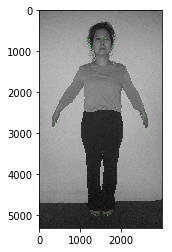

In [33]:
# Harris corner 
from matplotlib import pyplot as plt
import cv2  
import numpy as np  
  
image = cv2.imread('A.jpg')  
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
img_gray = np.float32(img_gray)  
  
dst = cv2.cornerHarris( img_gray, 2, 3, 0.04 )  
  
image[dst>0.15*dst.max()] = [0,0,255]  
  
plt.figure()
plt.imshow(img2_kp)
plt.show()  

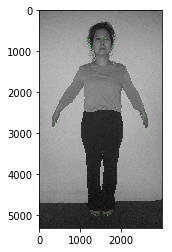

In [32]:
# ORB
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('A.jpg',0)

orb = cv2.ORB_create(edgeThreshold=15, patchSize=31, nlevels=8, fastThreshold=20, scaleFactor=1.2, WTA_K=2,scoreType=cv2.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=500)
#orb = cv2.ORB_create()
kp2 = orb.detect(img)
img2_kp = cv2.drawKeypoints(img, kp2, None, color=(0,255,0), flags=cv2.DrawMatchesFlags_DEFAULT)

plt.figure()
plt.imshow(img2_kp)
plt.show()